In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import itertools

# Model Helpers
from sklearn.preprocessing import Normalizer, scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Regression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_error

# Classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

# import warnings
# warnings.filterwarnings('ignore')

To center all plots and make visualization better, below IPython code will help

In [2]:
# Center all plots
from IPython.core.display import HTML

Task: Study the various Recommendation Techniques for recommending movies using
movies.csv, ratings.csv datasets

# Load movies.csv and ratings.csv dataset


In [3]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
df_r = ratings.copy()
df_m = movies.copy()    

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings.shape

(100836, 4)

In [6]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,100836.0,3.261276e+02,1.826185e+02,1.0,1.770000e+02,3.250000e+02,4.770000e+02,6.100000e+02
movieId,100836.0,1.943530e+04,3.553099e+04,1.0,1.199000e+03,2.991000e+03,8.122000e+03,1.936090e+05
rating,100836.0,3.501557e+00,1.042529e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,100836.0,1.205946e+09,2.162610e+08,828124615.0,1.019124e+09,1.186087e+09,1.435994e+09,1.537799e+09


In [7]:
ratings.drop('timestamp', axis=1, inplace=True)


In [8]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
movies.shape

(9742, 3)

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


## Merge both data frames on movieid


In [12]:
df_combined = pd.merge(df_r, df_m, on='movieId')

In [13]:
df_combined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [14]:
df_combined.shape

(100836, 6)

Visualization of the dataset

Genres

In [15]:
genres = {}

def find_genres():
    for genre in movies['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1
find_genres()

In [16]:
genres

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

Replace '(no genres listed)' by 'None'

In [17]:
# replace '(no genres listed)' by 'None'
genres['None'] = genres.pop('(no genres listed)')

Heavily Rated Movies

In [18]:
df_n_ratings = pd.DataFrame(df_combined.groupby('title')['rating'].mean())
df_n_ratings['total ratings'] = pd.DataFrame(df_combined.groupby('title')['rating'].count())
df_n_ratings.rename(columns = {'rating': 'mean rating'}, inplace=True)

df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean rating,total ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


Most of these movies stand among the Top 50 movies in the IMDB ratings even today.

/tmp/ipykernel_299/266369279.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_n_ratings['total ratings'], bins=20)


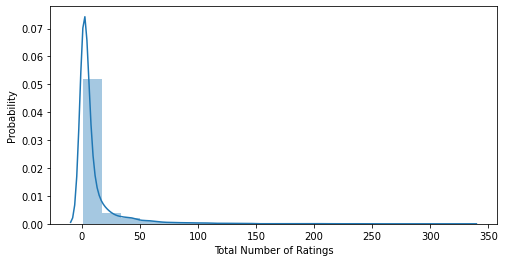

In [19]:
plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['total ratings'], bins=20)
plt.xlabel('Total Number of Ratings')
plt.ylabel('Probability')
plt.show()

We can see that- 
    - Majority of the moves have less than 50 ratings.
    - The number of movies having more than 100 ratings is very low.

Refer one cell above, we can see that there are only 3 movies with 300+ ratings

Highly Rated Movies

In [20]:
df_n_ratings.sort_values('mean rating', ascending=False).head(10)

,mean rating,total ratings
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1
"Thin Line Between Love and Hate, A (1996)",5.0,1
Lesson Faust (1994),5.0,2
Eva (2011),5.0,1
Who Killed Chea Vichea? (2010),5.0,1


In [21]:
print('Total no of users that gave rating of 5.0: ', len(df_n_ratings.loc[df_n_ratings['mean rating'] == 5]), '\n')
print('Total no of Individual users that gave rating of 5.0 : ', len(df_n_ratings.loc[(df_n_ratings['mean rating'] == 5) & (df_n_ratings['total ratings'] == 1)])
)
      

Total no of users that gave rating of 5.0:  296 

Total no of Individual users that gave rating of 5.0 :  289


Observations

1. As you can see there are over 296 users that have 5 stars, among which there are 289 individual raters (only user to rate the movie 5 star).

2. So, this cannot be the lone factor that should be considered while recommending movies. As this factor only shows the preferences of a particular user.

3. It would make a good recommendation system if we can use both the factors (->Highly Rated Movies and Heavily Rated Movies <-) together.

/tmp/ipykernel_299/2914651934.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_n_ratings['mean rating'], bins=30)


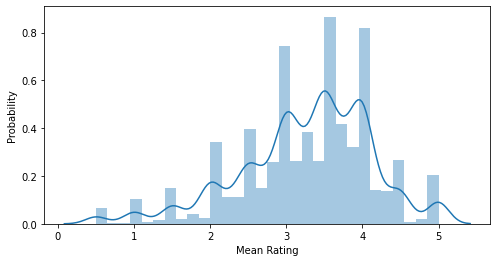

In [22]:
plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['mean rating'], bins=30)
plt.xlabel('Mean Rating')
plt.ylabel('Probability')
plt.show()

We can see that
    - Majority of the movies have mean rating of 3.5

# Collaborative Filtering (CF)

Collaborative filter is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources. Basically, it is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users

There are 2 approaches to CF

1. Memory-Based CF - It is an approach which finds similarity between users or between items to recommend similar items. Examples include Neighbourhood-based CF and Item-based/User-based top-N recommendations.
2. Model-Based CF - In this approach we use different data mining, machine learning algorithms to predict users' rating of unrated items. Examples include Singular Value Decomposition (SVD, Principal Component Analysis, etc).

## Create User-Item Matrix (Hint: Use pandas pivot_table method with index = 'userId',columns = 'title', values = 'rating' )

In [23]:
util_mat = df_combined.pivot_table(index='userId', columns='title', values='rating')
util_mat.head(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### Memory-based Collaborative Filtering

There are 2 approaches to Memory-Based CF
1. User-User Collaborative Filtering - In this we calculate similarity of all the users to the active user (the user whom the prediction is for). Then sort and filter the Top-N users to make predictions for the active user. This is usually very effective by takes a lot of time and resources. For example, if Dennis and Davis like the same movies and a new movie comes out that Davis likes, then we can recommend that movie to Dennis because Davis and Dennis seem to like the same movies.
2. Item-Item Collaborative Filtering - This is similar to User-User CF, just that we now compute similarity between items to recommend similar items. Eg. When you buy any product on Amazon, you will find this line "Users who bought this item also bought...", so Amazon uses item-item CF widely, mind that I'm not saying they use only item-item CF, they have hybrid techniques to better suit users of even unique interests.

Item-Item CF are a lot faster than User-User CF and secondly user profiles changes quickly and the entire system model has to be recomputed, whereas item's average ratings doesn't change that quickly, and this leads to more stable rating distributions in the model, so the model doesn't have to be rebuilt as often

Q) How do we calculate similarity?

Ans. There are many measures to calculate the similarity matrix, some of them are -->
1. Jaccard Similarity - It is a statistic used for comparing the similarity and diversity of sample sets. It is defined as the size of the intersection divided by the size of the union of the sample sets.
2. Cosine Similarity - It measures the angle between the ratings vector. If the angle is 0 degrees, then they are vectors having same orientation and if the angle is 180 degrees, then they are highly dissimilar vectors.
3. Pearson Similarity - It is actually Centered-Cosine similarity. We subtract the mean ratings from the user ratings, so that the mean is centered at 0, and then calculate the cosine similarity.

### User-Based Collaborative Filtering


####  Fill the row-wise NaNs in the User-Item Matrix with the corresponding user's mean ratings, and find the Pearson correlation between users

In [24]:
user_util_matrix = util_mat.copy()

In [25]:

# We will fill the row wise NaN's with the corresponding user's mean ratings, so that we can carry out Pearson correlation
# Here we assume avg ratings for the movie that is not rated.
user_util_matrix = user_util_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)
user_util_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.000000,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364



### Choose the correlation of all users with only User 1


In [26]:
user_util_matrix.T.corr()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,1.000000e+00,-4.975816e-17,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,7.652805e-16,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-1.265569e-15,-6.430371e-16,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,-4.975816e-17,1.000000e+00,-0.011260,-0.031539,0.004800,-2.587070e-16,-0.032471,-4.812885e-16,3.774064e-16,...,-0.004904,-0.016117,0.017749,-8.106536e-16,-1.430628e-03,-0.037289,-0.007789,-0.013001,-1.168878e-16,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,1.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,1.000000,0.009111,1.011715e-02,-0.012284,7.750436e-16,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.012016,6.225827e-03,-3.728895e-02,0.020590,0.026319,-0.009137,2.832591e-02,0.022277,3.163273e-02,-3.994577e-02,...,0.053683,0.016384,0.098011,6.107833e-02,1.967830e-02,1.000000,0.017927,0.056676,3.842210e-02,0.075464
607,0.055261,-2.050374e-02,-7.789105e-03,0.014628,0.031896,0.045501,3.098070e-02,0.048822,-1.216061e-02,-1.765576e-02,...,0.049059,0.038197,0.049317,2.355180e-03,-2.938114e-02,0.017927,1.000000,0.044514,1.904919e-02,0.021860
608,0.075224,-6.000828e-03,-1.300064e-02,-0.037569,-0.001751,0.021727,2.841409e-02,0.071759,3.278284e-02,-5.199963e-02,...,0.069198,0.051388,0.012801,6.318649e-03,-7.977761e-03,0.056676,0.044514,1.000000,5.071449e-02,0.054454


In [27]:
user_corr_mat = user_util_matrix.T.corr()
corr_user_1 = user_corr_mat.iloc[0]

Sort the User 1 correlation in the descending order


In [28]:
corr_user_1.sort_values(ascending=False, inplace=True)

In [29]:
corr_user_1

userId
1      1.000000
301    0.124799
597    0.102631
414    0.101348
477    0.099217
         ...   
71    -0.082932
370   -0.086678
501   -0.090018
579   -0.105003
53          NaN
Name: 1, Length: 610, dtype: float64

Drop the NaN values generated in the correlation matrix


In [30]:
corr_user_1.dropna(inplace=True)

### Choose the top 50 users that are highly correlated to User 1


In [31]:
top_50_corr_users = corr_user_1[1:51] # exclude the first one as it is the user itself

Below, we have list of all movies that user 1 has ever rated

In [32]:
df_combined[df_combined['userId']==1] 

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
267,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
369,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
16056,1,3744,4.0,964980694,Shaft (2000),Action|Crime|Thriller
16075,1,3793,5.0,964981855,X-Men (2000),Action|Adventure|Sci-Fi
16208,1,3809,4.0,964981220,What About Bob? (1991),Comedy
16243,1,4006,4.0,964982903,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi


### Predict the rating that User 1 might give for the movie with movieid 32 based on the top 50 user correlation matrix
(Hint: Predicted rating = sum of [(weights) * (ratings)] / sum of (weights ). Here, weights is the correlation of the corresponding user with the first user). That is, the predicted ratingis calculated as the weighted average of k similar users

In [33]:
df_combined[(df_combined['userId']==1) & (df_combined['movieId']== 32)]

,userId,movieId,rating,timestamp,title,genres


In [34]:
print('32nd Movie :', movies['title'][movies['movieId']==32].values)

32nd Movie : ['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']


So, let's calculate what ratings user 1 would give to the movie with the help of similiarity vector. And based on that rating, we can compare it with a threshold rating. If the rating is higher it will be visible to the active user in his/her recommend list. 

In [35]:
df_n_ratings.loc[['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']]

,mean rating,total ratings
title,,
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),3.983051,177


In [36]:
top_50_users = top_50_corr_users.keys()

count = 0
users = list()
for user in top_50_users:
    if df_combined[(df_combined['userId']==user) & (df_combined['movieId']==32)]['rating'].sum():
        count += 1
        users.append(user)
print(count)

30


There are 30 similar users among the Top-50 similar users that have rated the movie "The Twelve Monkeys."
    - Now, let's calculate the rating user 1 would give to the movie,
    - Predicted rating = sum of [(weights) * (ratings)]/sum of (weights)
Here, weights is the correlation of the correponding user with the first user. 

In [37]:
# Let's define a function to calculate what user1 will rate the movie
# We use weighted average of k similar users

def predict_rating():
    sum_similarity = 0
    weighted_ratings = 0
    for user in users:
        weighted_ratings += top_50_corr_users.loc[user] * df_combined[(df_combined['userId']==user) & (df_combined['movieId']==32)]['rating'].sum()
        sum_similarity += top_50_corr_users.loc[user]

    print(weighted_ratings/sum_similarity)
predict_rating()


4.1368953015974315


In [38]:
df_m[df_m['movieId']==32]

,movieId,title,genres
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


Well there are pretty good chances of recommending this movie to the 1st user, since the rating is quite good.

So, this is how a naive User-base CF works. Predicting ratings are calculated similarly for every user, (obviously for the movies he's not rated) and depending upon the threshold rating, the movie is either displayed on his recommended list or discarded

## Perform Item-based Collaborative Filtering


In [39]:
item_util_matrix = util_mat.copy()

item_util_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### Fill the column-wise NaN's in the User-Item Matrix with the corresponding movie's mean ratings, and find Pearson correlation between movies

In [40]:
item_util_matrix = item_util_matrix.apply(lambda col: col.fillna(col.mean()), axis=0)
item_util_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,4.000000,1.0
2,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
3,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
4,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
5,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0


In [41]:
item_util_matrix.isna().sum().sum()

0

This signifies that every Movie is rated by at least 1 user

In [42]:
item_util_matrix.corr()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,1.000000e+00,NaN,-2.470228e-17,NaN,-6.783236e-16,-4.090781e-16,...,NaN,1.491400e-15,-2.970631e-18,NaN,NaN,-1.174172e-16,-4.643126e-16,-1.457468e-15,2.901144e-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),NaN,NaN,NaN,NaN,-1.174172e-16,NaN,6.069910e-02,NaN,-7.527708e-02,2.947366e-02,...,NaN,-1.447002e-15,-3.196632e-16,NaN,NaN,1.000000e+00,3.784587e-02,1.243849e-15,-3.410933e-02,NaN
xXx (2002),NaN,NaN,NaN,NaN,-4.643126e-16,NaN,-3.527098e-03,NaN,1.558884e-01,2.511177e-01,...,NaN,-2.067568e-01,-4.854206e-03,NaN,NaN,3.784587e-02,1.000000e+00,2.449296e-01,1.854832e-02,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,-1.457468e-15,NaN,6.027298e-16,NaN,1.107823e-01,-1.311693e-15,...,NaN,-2.014024e-01,7.715167e-02,NaN,NaN,1.243849e-15,2.449296e-01,1.000000e+00,1.034849e-15,NaN


    * There are a lot of NaN values and that is because when we are calculating the Pearson correlation, if the rating vector has all the values same for eg -> [3.0, 3.0....], then the Standard deviation is zero and division by zero is undefined, and thus its correlation with any other rating vector is NaN.
    
    * Since there are many movies that are rated only by 1 user, there the whole column mean is filled with the rating of that user, and therefor it's Pearson correlation gives NaN values with any other column

In [43]:
item_corr_matrix = item_util_matrix.corr()

### Choose the correlation of all movies with the movie Jurassic Park (1993) only


In [44]:
# Let's find similar movies to jurassic park
df_n_ratings.loc[['Jurassic Park (1993)']]

,mean rating,total ratings
title,,
Jurassic Park (1993),3.75,238


### Sort the Jurassic Park movie correlation in descending order

In [45]:
jurassic_park_corr = item_corr_matrix['Jurassic Park (1993)']
jurassic_park_corr.sort_values(ascending=False)


title
Jurassic Park (1993)                                      1.000000
Fugitive, The (1993)                                      0.324717
Lethal Weapon (1987)                                      0.318646
Independence Day (a.k.a. ID4) (1996)                      0.263629
Mission: Impossible (1996)                                0.258080
                                                            ...   
Zoom (2015)                                                    NaN
Zulu (2013)                                                    NaN
[REC]³ 3 Génesis (2012)                                        NaN
anohana: The Flower We Saw That Day - The Movie (2013)         NaN
À nous la liberté (Freedom for Us) (1931)                      NaN
Name: Jurassic Park (1993), Length: 9719, dtype: float64

### Drop the NaN values generated in the correlation matrix

In [46]:
jurassic_park_corr.dropna(inplace=True)

### Find 10 movies similar to the movie Jurassic Park (1993)

In [47]:
movies_similar_to_jurassic_park = pd.DataFrame(jurassic_park_corr.values, columns=['Correlation'], index=jurassic_park_corr.index)
movies_similar_to_jurassic_park = movies_similar_to_jurassic_park.join(df_n_ratings['total ratings'])
movies_similar_to_jurassic_park.head(10)

,Correlation,total ratings
title,,
'Til There Was You (1997),-6.043681e-16,2
"'burbs, The (1989)",1.862643e-02,17
(500) Days of Summer (2009),-1.168543e-02,42
*batteries not included (1987),2.836663e-02,7
...And Justice for All (1979),-5.273448e-02,3
10 (1979),-7.975959e-03,4
10 Cent Pistol (2015),-5.370216e-02,2
10 Cloverfield Lane (2016),8.355363e-02,14
10 Items or Less (2006),-4.514595e-02,3


# Model-Based Collaborative Filtering

Model-based methods are based on matrix factorization and are better at dealing with sparsity.

    - We will be using a "Surprise" library to implement SVD, KNN, NMF.

    - You can find its documentation here > https://surprise.readthedocs.io/en/stable/

    - Surprise Library has almost all the algorithms implemented that are required for model-based Recomendation systems.

## Perform KNNBasic, SVD, NMF Model-based Collaborative Filtering
Initialize KNNBasic with similarity configuration as Mean Squared Distance Similarity (msd), 20 neighbors and cross-validate 5 folds against measure RMSE.
(Hint: cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True))


In [48]:
from surprise import Reader, Dataset, KNNBasic, SVD, NMF
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
from surprise import accuracy

To load a data set from a pandas dataframe, you will need the load_from_df() method. You will also need a Reader object, but only the rating_scale parameter must be specified. 

The Reader class is used to parse a file containing ratings.

In [49]:
reader = Reader(rating_scale=(0.5, 5.0))

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader = reader)

## K-Nearest Neighbours (KNN)

cross_validate - Run a cross validation procedure for a given algorithm, reporting accuracy measures and computation times.

In [50]:
# Compute Mean Square Distance Similarity
sim_options = {'name':'msd'}

algo = KNNBasic(k=20, sim_options=sim_options)
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9375  0.9457  0.9320  0.9431  0.9424  0.9401  0.0048  
Fit time          0.05    0.07    0.07    0.07    0.07    0.06    0.01    
Test time         0.66    0.66    0.67    0.68    0.67    0.67    0.01    


{'test_rmse': array([0.93754413, 0.94566361, 0.9320113 , 0.94308103, 0.94239379]),
 'fit_time': (0.05476045608520508,
  0.0671083927154541,
  0.06592249870300293,
  0.06724691390991211,
  0.06961488723754883),
 'test_time': (0.6585235595703125,
  0.6624901294708252,
  0.6700260639190674,
  0.6828279495239258,
  0.6721796989440918)}

### Tuning KNN using GridSearchCV

The GridSearchCV computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. This is useful for finding the best set of parameters for a prediction algorithm. It is analogous to GridSearchCV from scikit-learn

In [51]:
n_neighbors = [10, 20, 30]
param_grid = {'n_neightbors': n_neighbors}

gs = GridSearchCV(KNNBasic, param_grid, measures=['RMSE'])
gs.fit(data)

print('\n\n#####################')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

### Initialize Singular Value Decomposition (SVD) and cross-validate 5 folds against measure RMSE.


In [52]:
algo = SVD()
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8709  0.8674  0.8772  0.8716  0.8790  0.8732  0.0043  
Fit time          3.72    3.72    3.71    3.70    3.65    3.70    0.03    
Test time         0.10    0.10    0.17    0.10    0.16    0.13    0.03    


{'test_rmse': array([0.87089596, 0.86740027, 0.87722242, 0.87164613, 0.87903238]),
 'fit_time': (3.719278335571289,
  3.7162373065948486,
  3.7068419456481934,
  3.7044103145599365,
  3.645864725112915),
 'test_time': (0.09967041015625,
  0.1015627384185791,
  0.17023539543151855,
  0.09887337684631348,
  0.16468477249145508)}

Fine Tuning SVD using GridSearchCV

In [53]:
param_grid = {'n_factors': [50, 75], 'lr_all': [0.005, 0.05], 'reg_all': [0.06, 0.04]}

gs = GridSearchCV(algo_class=SVD, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n\n#####################')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])



#####################
Best Score : 0.8642513853283557
Best Parameters : {'n_factors': 75, 'lr_all': 0.05, 'reg_all': 0.06}


### Initialize Non-Negative Matrix Factorization (NMF) and cross-validate 5 folds against measure RMSE.


### Non-Negative Matrix Factorization (NMF)

In [54]:
algo = NMF()
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9132  0.9259  0.9216  0.9165  0.9259  0.9206  0.0051  
Fit time          4.06    4.14    4.09    4.09    4.37    4.15    0.11    
Test time         0.08    0.08    0.15    0.08    0.15    0.11    0.03    


{'test_rmse': array([0.91322666, 0.92592981, 0.92160415, 0.91653318, 0.92591878]),
 'fit_time': (4.0612874031066895,
  4.144228219985962,
  4.094905614852905,
  4.093417167663574,
  4.3746795654296875),
 'test_time': (0.08326005935668945,
  0.08378934860229492,
  0.14804315567016602,
  0.08379912376403809,
  0.1504974365234375)}

From the Cross validation scores, we can see SVD is the best model with its lesser value for RMSE compared to KNN and NMF.

Hence choosing SVD as the best model and choing the best parameters from GridSearchCV of SVD

Best Parameters :{'n_factors':75, 'lr_all':0.05, 'reg_all':0.06}

In [55]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD(n_factors=50, n_epochs=25, lr_all=0.05, reg_all=0.06)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.8653


0.8652877956932478

Let's check how good or bad our predictions are:

The following function will creat a pandas dataframe which will consist of these columns:

UID: user-id

iid: item id

Rui: the rating given by the user

est: rating estimated by the model

lu: No of items rated by the user

UI: number of users that have rated this item

err: abs difference between predicted rating and the actual rating

In [57]:
def get_Iu(uid):
    '''
    args:
        uid: the id of the user
    returns:
        the number of items rated by the user
    '''
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0

def get_Ui(iid):
    '''
    args:
        iid: the raw id of the item
    returns:
        the number of users that have rated the item
    '''
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

df_predictions = pd.DataFrame(predictions, columns=['uid','iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)

In [58]:
df_predictions.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,483,88356,3.0,3.030868,{'was_impossible': False},543,2,0.030868
1,202,3703,3.0,4.134774,{'was_impossible': False},317,30,1.134774
2,368,3162,3.0,3.063081,{'was_impossible': False},333,0,0.063081
3,463,110,4.5,4.705906,{'was_impossible': False},25,179,0.205906
4,414,5009,4.0,3.300425,{'was_impossible': False},2017,6,0.699575


Let's see the 10 best and worst predictions our model made

In [59]:
best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]

In [60]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
10467,543,6377,5.0,5.0,{'was_impossible': False},54,104,0.0
18270,465,608,5.0,5.0,{'was_impossible': False},86,130,0.0
18263,251,2571,5.0,5.0,{'was_impossible': False},17,212,0.0
15437,122,109487,5.0,5.0,{'was_impossible': False},222,49,0.0
25084,348,6016,5.0,5.0,{'was_impossible': False},38,47,0.0
14387,201,356,5.0,5.0,{'was_impossible': False},77,233,0.0
3000,37,671,5.0,5.0,{'was_impossible': False},18,28,0.0
1166,523,150548,5.0,5.0,{'was_impossible': False},51,7,0.0
20285,371,1274,5.0,5.0,{'was_impossible': False},32,29,0.0
18798,122,1276,5.0,5.0,{'was_impossible': False},222,43,0.0


In [61]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
13339,64,3969,0.5,4.256356,{'was_impossible': False},380,21,3.756356
16741,258,87232,0.5,4.280778,{'was_impossible': False},19,34,3.780778
3807,266,2791,1.0,4.791378,{'was_impossible': False},141,67,3.791378
11190,159,3147,0.5,4.376659,{'was_impossible': False},65,81,3.876659
14206,413,1198,1.0,5.000000,{'was_impossible': False},38,152,4.000000
18921,598,593,0.5,4.589831,{'was_impossible': False},13,209,4.089831
5280,594,7982,0.5,4.601088,{'was_impossible': False},181,2,4.101088
14501,573,44199,0.5,4.604566,{'was_impossible': False},213,30,4.104566
10675,594,7116,0.5,4.696532,{'was_impossible': False},181,3,4.196532
19360,543,89904,0.5,5.000000,{'was_impossible': False},54,7,4.500000


### Print best score and best params from Cross Validate on all the models built.

Conclusion

- We have studied both Memory Based and Model Based Collaborative Filtering.
- User based CF works for new movie user rating
- item based CF works for identifying movie similarity
- In case of Model Based CF, from the score, SVD gives the best performance.
- SVD gives the least RMSE mean score from 5 folds of 87%
- We have also seen the best predictions and worst predictions from the SVD model.
- The worst predictions shows that there are some outliers in the dataset.
- NMF Model stands second and KNN third in the RMSE scores
- The model fit time for each folds is minimum in KNN
- NMF model takes the highest fir time for all folds
- The test time for each folds is higher in KNN and minimum in NMF
Its a trade off between results and prediction time